In [1]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

In [2]:
device = torch.device("cuda:0")

In [3]:
torch.__version__

'1.9.1+cu111'

In [4]:
torch.cuda.is_available()

True

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('yolov7-w6-pose.pt')
model = weigths['model']
model = model.half().to(device)
_ = model.eval()

In [8]:
image = cv2.imread('dataset/processed_images/00116_01.jpg')
image = letterbox(image, 640, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))
image = image.to(device)
image = image.half()

output, _ = model(image)

In [7]:
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

In [10]:
output[0]

array([          0,           0,      349.56,      498.88,      466.25,         815,     0.95744,      310.75,       176.5,     0.99854,         326,         161,     0.98828,      292.25,       162.5,     0.99512,      346.75,      166.25,     0.67822,       264.5,         170,     0.57959,         406,       245.5,
           0.97949,      246.25,         260,     0.97656,         512,      330.75,     0.96387,      246.12,      365.75,      0.9541,         540,      456.25,     0.95752,      169.62,         392,     0.94727,       414.5,         487,     0.99121,      311.75,         483,     0.99072,      347.75,       675.5,
           0.98291,       221.5,         639,     0.98193,       423.5,         766,     0.92285,      198.88,       822.5,     0.92041])

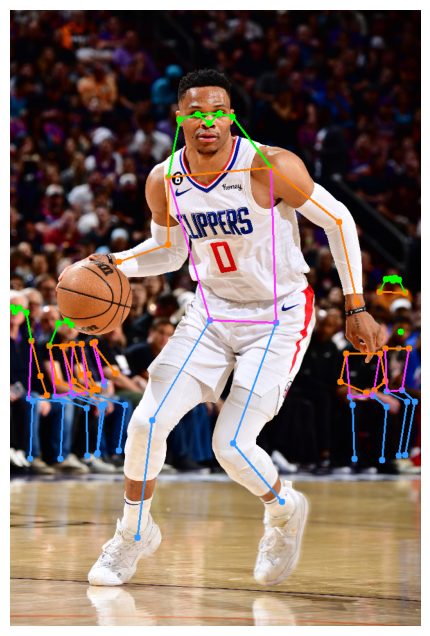

In [8]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()